In [4196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [4197]:
rodada_jogada = 26               # Ultima rodada jogada: 28
rodada_prox = rodada_jogada+1    # Rodada da proxima semana: 29

rodada_futura = pd.read_excel(f'dados/rodadas/rodada-{rodada_prox}.xlsx')
todas_rodadas = pd.read_excel('dados/rodadas/todas_rodadas.xlsx')
tabela = pd.read_excel(f'dados/tabela/tabela-rodada_{rodada_jogada}.xlsx')
historico = pd.read_excel(f'dados/historico/historico-rodada_{rodada_jogada}.xlsx')
historico.drop(['Time', 'Comp', 'Day', 'Result'], axis= 1, inplace= True)


In [4198]:
historico['Venue'] = historico['Venue'].map({'Home': 1, 'Away': 0})

In [4199]:
historico['Date'] = pd.to_datetime(historico['Date'], format='%Y-%m-%d')
historico['days'] = (max(historico['Date']) - historico['Date']).dt.days
historico['time_diff'] = np.exp(-0.001*historico['days'])

In [4200]:
historico.head()

,Date,Round,Venue,GF,GA,Opponent,xG,xGA,Poss,Attendance,...,GCA,TklW,Def 3rd,Mid 3rd,Att 3rd,Int,Err,Equipe,days,time_diff
0,2023-04-15,1,1,2,1,Sao Paulo,0.9,2.0,33,11708.0,...,3,6,4,4,1,17,0,Botafogo (RJ),182,0.833601
1,2023-04-24,2,0,2,1,Bahia,0.2,0.9,42,27822.0,...,4,11,8,16,0,15,0,Botafogo (RJ),173,0.841138
2,2023-04-30,3,0,3,2,Flamengo,1.9,3.1,26,53138.0,...,6,12,11,6,1,11,0,Botafogo (RJ),167,0.846200
3,2023-05-07,4,1,2,0,Atletico Mineiro,2.0,0.5,39,18218.0,...,3,14,10,12,0,13,1,Botafogo (RJ),160,0.852144
4,2023-05-11,5,1,3,0,Corinthians,2.6,0.6,53,22388.0,...,5,5,4,5,1,11,0,Botafogo (RJ),156,0.855559


In [4201]:
historico.columns

Index(['Date', 'Round', 'Venue', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
       'Attendance', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'FK', 'PK', 'PKatt',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SoTA', 'Saves', 'Save%', 'CS',
       'PSxG', 'PSxG+/-', 'TotDist', 'PrgDist', 'Ast', 'xAG', 'xA', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'TB', 'Sw', 'Crs', 'Blocks', 'SCA',
       'GCA', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Int', 'Err', 'Equipe',
       'days', 'time_diff'],
      dtype='object')

In [4202]:
tabela.columns

Index(['Unnamed: 0', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv',
       'xGAConv', 'GF/MP', 'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total',
       'GF_casa', 'GF_fora', 'GF_total', 'GA_casa', 'GA_fora', 'GA_total',
       'xG_sofrido_casa', 'xG_sofrido_fora', 'xG_5casa', 'xG_5fora',
       'xG_5total', 'GF_5casa', 'GF_5fora', 'GF_5total', 'GA_5casa',
       'GA_5fora', 'GA_5total', 'xG_5sofrido_casa', 'xG_5sofrido_fora',
       'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa', 'Tklw_casa', 'Sh_fora',
       'SoT_fora', 'Saves_fora', 'GCA_fora', 'Tklw_fora'],
      dtype='object')

In [4203]:
historico.drop(376, inplace= True)
historico.drop(191, inplace= True)

In [4204]:
modelo = smf.glm(formula= 'GF ~ C(Equipe)*C(Venue)*xG + time_diff + C(Opponent)', data= historico, family= sm.families.Poisson()).fit()
print(modelo.summary())

PatsyError: Error evaluating factor: NameError: name 'posicao_tabela' is not defined
    GF ~ C(Equipe)*C(Venue)*xG + time_diff + C(Opponent) + posicao_tabela
                                                           ^^^^^^^^^^^^^^

# Analise de Residuo

In [ ]:
residuos = modelo.resid_response
residuos_media = residuos.mean()
residuos_padrao = modelo.resid_pearson
fitted = modelo.fittedvalues
observados = historico['GF']

<Axes: xlabel='GF'>

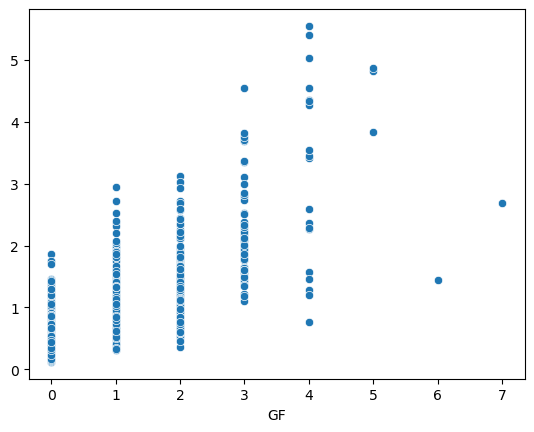

In [ ]:
sns.scatterplot(x= observados, y= fitted)

<Axes: >

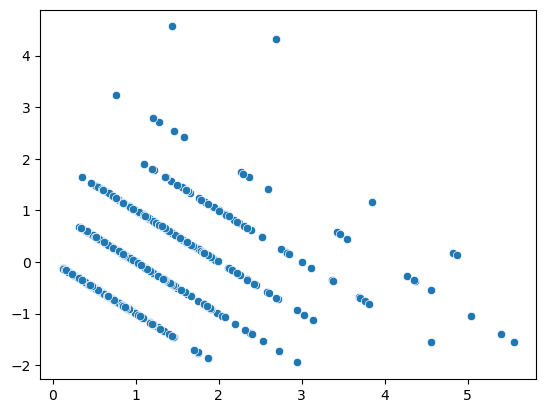

In [ ]:
sns.scatterplot(x= fitted, y = residuos)

<Axes: >

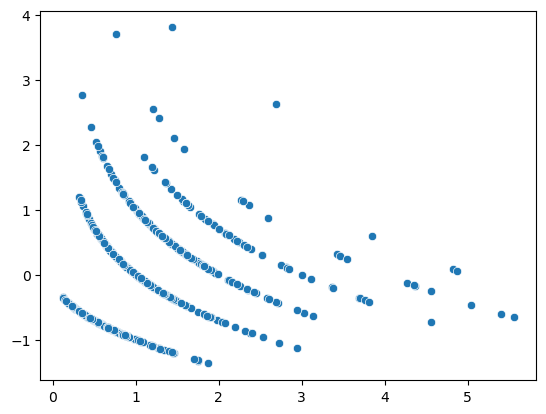

In [ ]:
sns.scatterplot(x= fitted, y= residuos_padrao)

In [ ]:
infl = modelo.get_influence()
infl.summary_frame().sort_values("cooks_d", ascending= False)

,dfb_Intercept,dfb_C(Equipe)[T.Ath Paranaense],dfb_C(Equipe)[T.Atletico Mineiro],dfb_C(Equipe)[T.Bahia],dfb_C(Equipe)[T.Botafogo (RJ)],dfb_C(Equipe)[T.Bragantino],dfb_C(Equipe)[T.Corinthians],dfb_C(Equipe)[T.Coritiba],dfb_C(Equipe)[T.Cruzeiro],dfb_C(Equipe)[T.Cuiaba],...,dfb_C(Equipe)[T.Internacional]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Palmeiras]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Santos]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Sao Paulo]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Vasco da Gama]:C(Venue)[T.1]:xG,dfb_time_diff,cooks_d,standard_resid,hat_diag,dffits_internal
358,-0.060435,-0.016981,-2.981082e-02,2.473657,-4.455421e-03,0.018113,-0.013620,-0.001490,-0.011447,0.036723,...,0.005564,0.071364,-0.030340,-0.001159,2.262738e-02,0.091376,1.798318e+00,-3.008797,0.952072,-13.410149
198,-0.164281,0.016109,-9.534074e-04,0.042210,-6.597129e-03,0.042307,0.010246,0.028248,0.008348,-0.007568,...,0.013766,0.022074,0.027685,0.008142,1.192015e-02,0.218320,1.586410e-01,-1.396798,0.890484,-3.982976
409,0.042042,-0.001927,1.263040e-02,-0.015125,3.441550e-03,0.015691,0.011525,0.028672,-0.002264,0.036600,...,0.003795,-0.022808,-0.000913,-0.007219,2.373962e-02,-0.066269,1.151077e-01,-1.657230,0.807366,-3.392752
499,-0.021440,0.000583,-9.223133e-03,-0.002549,-2.709024e-03,0.004087,-0.002752,0.006451,-0.006670,0.005104,...,0.002566,0.002480,1.175667,0.003717,-2.840326e-03,0.031670,9.870655e-02,-1.112627,0.888560,-3.141760
361,-0.247414,0.008834,-6.772325e-03,0.563847,1.105969e-02,0.029930,-0.011457,0.020799,-0.004055,0.050878,...,-0.017283,0.124963,-0.059868,-0.028146,2.121201e-02,0.328278,3.074610e-02,4.134509,0.152444,1.753457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.000311,-0.000055,-1.000256e-04,-0.000014,-9.095465e-05,-0.000116,-0.000107,0.002771,-0.000091,0.000040,...,0.000040,-0.000080,-0.000006,0.000002,-1.164129e-04,-0.000386,3.001322e-07,0.013819,0.135823,0.005478
163,0.000322,-0.000074,3.649251e-05,-0.000135,-4.323606e-07,0.000016,-0.000006,0.000044,0.000006,-0.000013,...,-0.000031,-0.000037,-0.000070,-0.000039,6.364748e-05,-0.000392,1.462395e-07,-0.007866,0.191186,-0.003824
397,-0.000175,0.000013,-1.515137e-05,-0.000012,1.097384e-05,-0.000005,0.000027,0.000003,-0.000040,-0.000011,...,0.000021,0.000071,0.000018,0.000019,2.033891e-05,0.000271,4.947760e-08,-0.005235,0.152912,-0.002224
253,0.000097,-0.000010,-3.365931e-07,-0.000007,-8.590106e-06,-0.000012,-0.000011,-0.000008,0.000017,-0.000012,...,-0.000002,-0.000007,-0.000006,0.000024,-7.729128e-06,-0.000087,1.373227e-09,0.000748,0.197276,0.000371


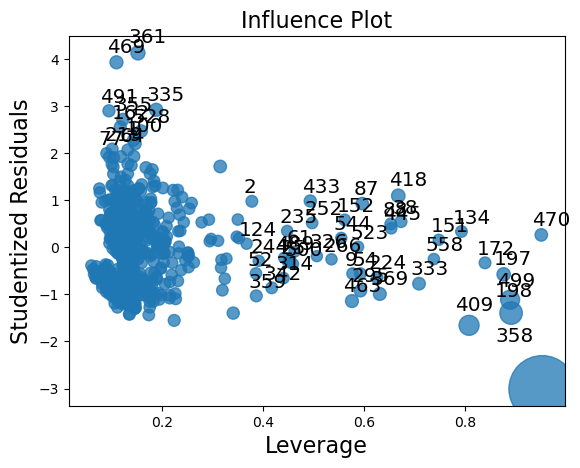

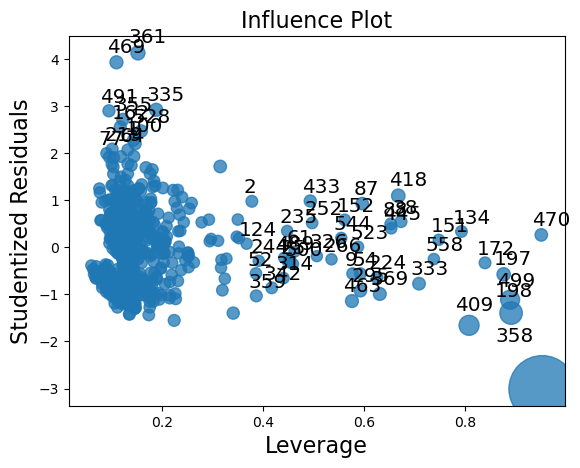

In [ ]:
infl.plot_influence()

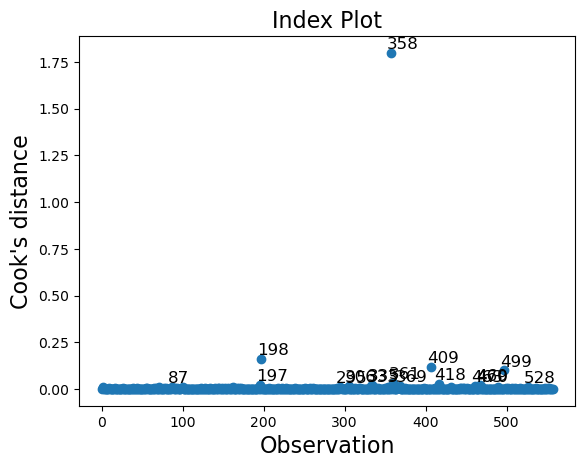

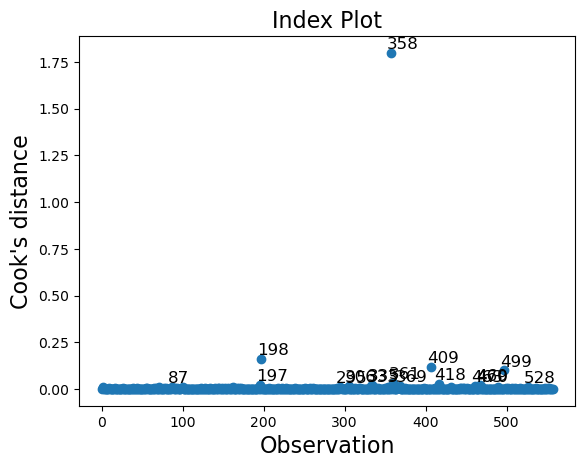

In [ ]:
infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())

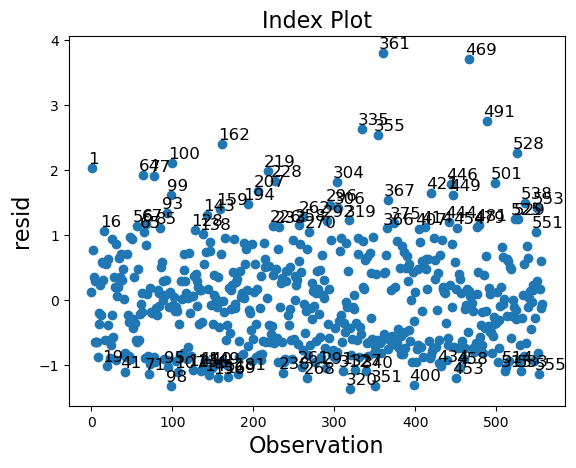

In [ ]:
fig = infl.plot_index(y_var="resid", threshold=1)

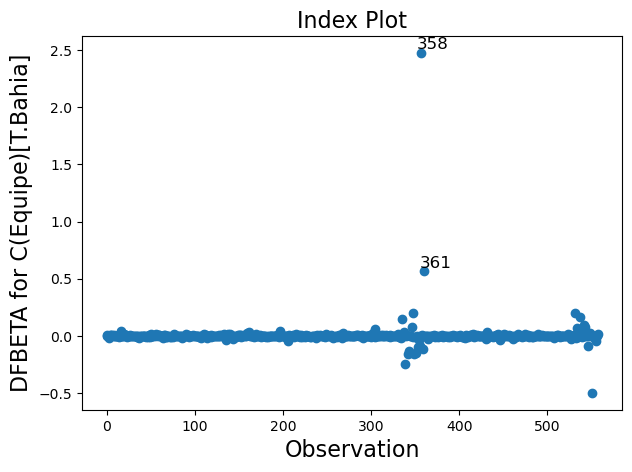

In [ ]:
fig = infl.plot_index(y_var="dfbeta", idx=3, threshold=0.5)
fig.tight_layout(pad=1.0)


# Selecão de Modelo

# Seleção de Variaveis

# Previsao

In [ ]:
tabela.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv', 'xGAConv', 'GF/MP',
       'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total', 'GF_casa', 'GF_fora',
       'GF_total', 'GA_casa', 'GA_fora', 'GA_total', 'xG_sofrido_casa',
       'xG_sofrido_fora', 'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa',
       'Tklw_casa', 'Sh_fora', 'SoT_fora', 'Saves_fora', 'GCA_fora',
       'Tklw_fora', 'xG_5casa', 'xG_5fora', 'xG_5total', 'GF_5casa',
       'GF_5fora', 'GF_5total', 'GA_5casa', 'GA_5fora', 'GA_5total',
       'xG_5sofrido_casa', 'xG_5sofrido_fora'],
      dtype='object')

In [ ]:
def rho_dependencia(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0

def matrix_probs(df, tabela= tabela):
  probs_gols = {}
  lambdas = {}
  matriz_gols = {}
  rho_matriz = {}

  for i in range(0, 10):
    tabela_casa = tabela[tabela['Squad'] == df.iloc[i,3]]
    tabela_fora = tabela[tabela['Squad'] == df.iloc[i,8]]
    lambda_x = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 3], 
                                                 'Opponent': df.iloc[i, 8],
                                                 'Venue': 1,
                                                 'xG': float(tabela_casa['xG_casa']),
                                                 'time_diff': 1,
                                                 'posicao_tabela': tabela_casa['Rk']},
                                           index=[1])).values[0]
    lambda_y = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 8], 
                                                 'Opponent': df.iloc[i, 3],
                                                 'Venue': 0,
                                                 'xG': float(tabela_fora['xG_fora']),
                                                 'time_diff': 1,
                                                 'posicao_tabela': tabela_fora['Rk']},
                                           index=[1])).values[0]
    
    lambdas[df.iloc[i, 3]] = [lambda_x, lambda_y]
    probs_gols[df.iloc[i, 3]] = [[stats.poisson.pmf(i, lambdas) for i in range(0, 8)] for lambdas in [lambda_x, lambda_y]]
    matriz_gols[df.iloc[i, 3]] = np.outer(probs_gols[df.iloc[i, 3]][0], probs_gols[df.iloc[i, 3]][1])
    rho_matriz[df.iloc[i, 3]] = np.array([[rho_dependencia(gol_casa, gol_fora, lambda_x, lambda_y, (-0.13)) for gol_fora in range(2)] for gol_casa in range(2)])
    matriz_gols[df.iloc[i, 3]][:2,:2] = matriz_gols[df.iloc[i, 3]][:2,:2] * rho_matriz[df.iloc[i, 3]]

  return matriz_gols, probs_gols, lambdas#, rho_matriz


def inserir_df(matriz, df, probs_gols, lambdas):
  times = list(matriz.keys())
  gols2 = pd.DataFrame()

  for time in times:
    df.loc[df['Home'] == time, 'vitoria_casa'] = np.sum(np.tril(matriz[time], -1))
    df.loc[df['Home'] == time, 'empate'] = np.sum(np.diag(matriz[time]))
    df.loc[df['Home'] == time, 'vitoria_fora'] = np.sum(np.triu(matriz[time], 1))
    
    lambdas1 = pd.DataFrame(lambdas[time]).T
    gols = pd.concat([lambdas1, pd.DataFrame(probs_gols[time][0]).T, pd.DataFrame(probs_gols[time][1]).T], axis= 1)
    gols['Home'] = time
    gols2 = pd.concat([gols2, gols])

  gols2.columns = ['lambda_x', 'lambda_y',
                  '0x', '1x', '2x', '3x', '4x', '5x', '6x', '7x',
                  '0y', '1y', '2y', '3y', '4y', '5y', '6y', '7y',
                  'Home']
  df = pd.merge(df, gols2, on= 'Home')
  return df

In [ ]:
matriz_gols, prob_gols, lambdas = matrix_probs(rodada_futura)
rodada_futura = inserir_df(matriz_gols, rodada_futura, prob_gols, lambdas)

# Adicionar em 'Todas Previsoes'

In [ ]:
todas_previsoes = pd.read_excel('dados/previsoes/todas_previsoes.xlsx', index_col= None)
todas_previsoes.drop(todas_previsoes.columns[0], axis=1, inplace= True)

In [ ]:
def compare_columns(row):
    if row['gols_casa'] > row['gols_fora']:
        return 'gols_casa'
    elif row['gols_casa'] < row['gols_fora']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns1(row):
    if row['vitoria_casa'] > row['empate'] and row['vitoria_casa'] > row['vitoria_fora']:
        return 'gols_casa'
    elif row['vitoria_fora'] > row['empate'] and row['vitoria_fora'] > row['vitoria_casa']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns2(row):
    if row['acerto1'] == row['acerto2']:
        return 'acerto'
    else:
        return 'fracasso'

In [ ]:
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['vitoria_casa'] == None).all():
  todas_previsoes = pd.concat([todas_previsoes, rodada_futura], ignore_index= True)

if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].isna()).all():
  resultados = todas_rodadas[todas_rodadas['Wk'] >= todas_previsoes['Wk'].min()].reset_index().drop('index', axis= 1)
  todas_previsoes.update(resultados)
  
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].notna()).all():  
  todas_previsoes['acerto1'] = todas_previsoes.apply(compare_columns, axis=1)
  todas_previsoes['acerto2'] = todas_previsoes.apply(compare_columns1, axis=1)
  todas_previsoes['acerto'] = todas_previsoes.apply(compare_columns2, axis=1)
  todas_previsoes.drop(['acerto1', 'acerto2'], axis=1, inplace= True)

In [ ]:
todas_previsoes.to_excel('dados/previsoes/todas_previsoes.xlsx')
rodada_futura.to_excel(f'dados/previsoes/previsao_rodada-{rodada_prox}.xlsx')